In [9]:
###generate random problems###

from BOT.data_generation import fourier_random_bot_problem,uniform_random_bot_problem 

#uniform sampling of positions and demands
bot_problem_dict1 = uniform_random_bot_problem(num_sources=3,num_sinks=20)

#problems with more interesting structure
bot_problem_dict2 = fourier_random_bot_problem(n=23,num_sources=3)

print(bot_problem_dict1)
print(bot_problem_dict2)

{'al': 0.8363698507063736, 'coords_sources': array([[0.73329863, 0.46606138],
       [0.05098807, 0.12036348],
       [0.76022039, 0.93203191]]), 'coords_sinks': array([[0.40052691, 0.98494229],
       [0.81109638, 0.3071439 ],
       [0.59739239, 0.03040305],
       [0.09658721, 0.26406807],
       [0.0152434 , 0.02570298],
       [0.31228129, 0.31378757],
       [0.7810521 , 0.64808146],
       [0.96214609, 0.67706777],
       [0.47990165, 0.56441358],
       [0.90926037, 0.4863588 ],
       [0.12055718, 0.97868562],
       [0.56810813, 0.121227  ],
       [0.05960549, 0.97755653],
       [0.12894436, 0.93445108],
       [0.66324673, 0.64190904],
       [0.02934073, 0.02904817],
       [0.75660651, 0.94042742],
       [0.56631892, 0.87877462],
       [0.9627634 , 0.06659529],
       [0.99981841, 0.63313302]]), 'supply_arr': array([0.3739733 , 0.41121378, 0.21481292]), 'demand_arr': array([0.0122411 , 0.0621573 , 0.061474  , 0.02676381, 0.01864738,
       0.10666781, 0.0479515 , 0.044

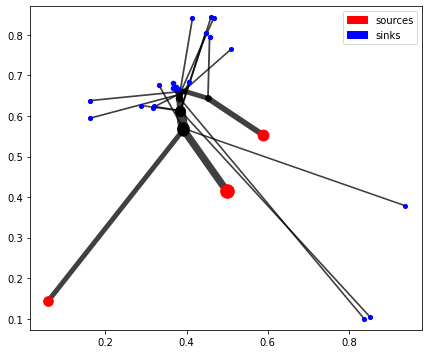

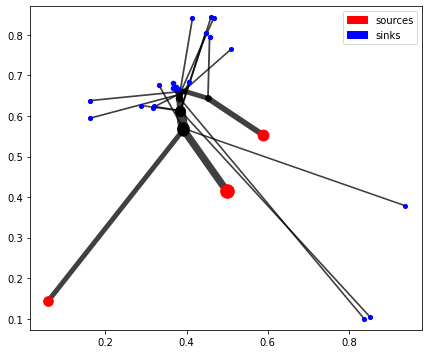

In [10]:
###generate topologies and optimize geometry###

from BOT.topology import generate_topologies
from BOT.geometry_optimization import BOT_optimize
from BOT.utilities import visualize_solution

topo = next(generate_topologies(n=1,nsites=23))

supply_arr = bot_problem_dict2["supply_arr"]
demand_arr = bot_problem_dict2["demand_arr"]
coords_sources = bot_problem_dict2["coords_sources"]
coords_sinks = bot_problem_dict2["coords_sinks"]
al = bot_problem_dict2["al"]

topo,cost,coords,flows,_ = BOT_optimize(topo,supply_arr,demand_arr,coords_sources,coords_sinks,al)

visualize_solution(topo,coords,flows,bot_problem_dict2)



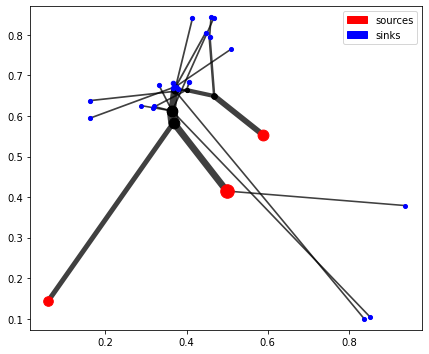

found improvement after checking 1 topologies. New cost: 0.919504
found improvement after checking 6 topologies. New cost: 0.918793
found improvement after checking 1 topologies. New cost: 0.915573
found improvement after checking 1 topologies. New cost: 0.904754
found improvement after checking 1 topologies. New cost: 0.901317
found improvement after checking 24 topologies. New cost: 0.888973
found improvement after checking 4 topologies. New cost: 0.881858
found improvement after checking 1 topologies. New cost: 0.881857
found improvement after checking 1 topologies. New cost: 0.881754
found improvement after checking 7 topologies. New cost: 0.879179
found improvement after checking 22 topologies. New cost: 0.878385
found improvement after checking 8 topologies. New cost: 0.878362
found improvement after checking 12 topologies. New cost: 0.873695
found improvement after checking 10 topologies. New cost: 0.872825
found improvement after checking 1 topologies. New cost: 0.872825
found 

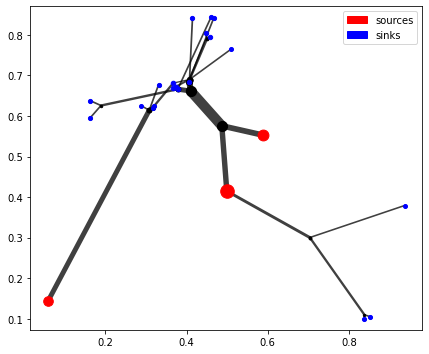

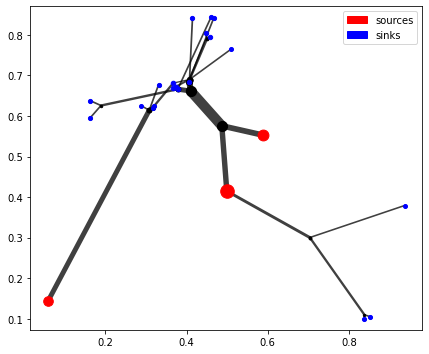

In [11]:
###optimize topologies###

from BOT.heuristics import downhill_climb,BOT_local_search

topo = next(generate_topologies(n=1,nsites=23))

supply_arr = bot_problem_dict2["supply_arr"]
demand_arr = bot_problem_dict2["demand_arr"]
coords_sources = bot_problem_dict2["coords_sources"]
coords_sinks = bot_problem_dict2["coords_sinks"]
al = bot_problem_dict2["al"]

#Python implementation
topo,cost,coords,flows = downhill_climb(topo,bot_problem_dict2,maxiter=200,num_tries=100)
visualize_solution(topo,coords,flows,bot_problem_dict2)

#faster C++ implementation
topo,cost,coords,flows,_ = BOT_local_search(topo,supply_arr,demand_arr,coords_sources,coords_sinks,al,max_steps=200,max_tries=100,kernel=1.0)
visualize_solution(topo,coords,flows,bot_problem_dict2)

number of LP iterations: 7/1000
number of LP iterations: 1/1000


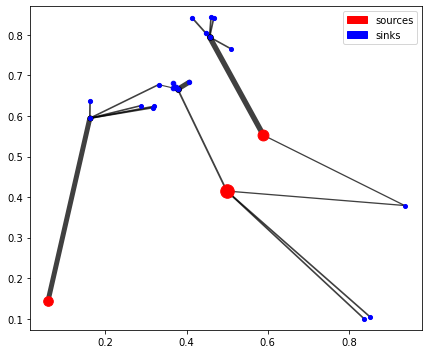

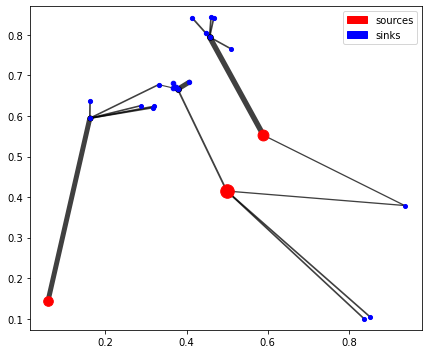

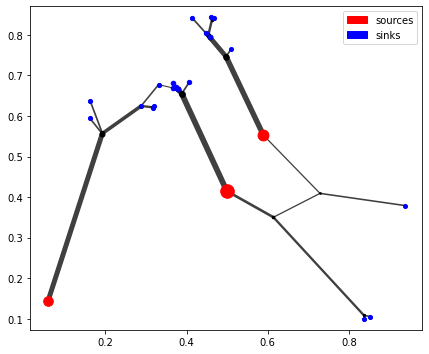

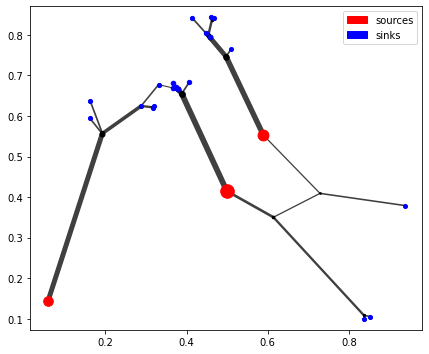

In [12]:
###DSCUP as prior###

from BOT.heuristics import DSCUP

topo,coords = DSCUP(bot_problem_dict2)
topo,cost,coords_relaxed,flows,_ = BOT_optimize(topo,supply_arr,demand_arr,coords_sources,coords_sinks,al)
topo_improved,cost_improved,coords_improved,flows_improved,_ = BOT_local_search(topo,supply_arr,demand_arr,coords_sources,coords_sinks,al,max_steps=50,max_tries=100,kernel=1.0)

visualize_solution(topo,coords,flows,bot_problem_dict2)
visualize_solution(topo,coords,flows,bot_problem_dict2)
visualize_solution(topo_improved,coords_improved,flows_improved,bot_problem_dict2)